# step-1: BUSINESS PROBLEM UNDERSATANDING
**"How can we accurately predict the resale value of a used car based on its features, to help both buyers and sellers make informed decisions in the second-hand car market?"**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\L.RAMYA\Downloads\output.csv")
df

,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats,type
0,mahindra,thar,manual,4.0,diesel,2184.0,11003.0,1.0,1231000.0,NaN,NaN,NaN,NaN,NaN
1,hyundai,verna,manual,6.0,petrol,1591.0,66936.0,1.0,786000.0,NaN,NaN,NaN,NaN,NaN
2,tata,harrier,manual,2.0,diesel,1956.0,27990.0,1.0,1489000.0,NaN,NaN,NaN,NaN,NaN
3,honda,city,automatic,1.0,petrol,1498.0,5061.0,1.0,1227000.0,NaN,NaN,NaN,NaN,NaN
4,ford,ecosport,manual,3.0,diesel,1498.0,23480.0,1.0,887000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32195,datsun,redi go,manual,6.0,petrol,NaN,11500.0,1.0,292000.0,maharashtra,NaN,NaN,5.0,hatchback
32196,toyota,yaris,manual,6.0,petrol,NaN,73393.0,2.0,534000.0,karnataka,NaN,NaN,5.0,sedan
32197,volkswagen,ameo,manual,8.0,petrol,NaN,83810.0,2.0,424000.0,uttar pradesh,NaN,NaN,5.0,sedan
32198,hyundai,grand i10 nios,automatic,5.0,petrol,NaN,39162.0,1.0,685000.0,chandigarh,NaN,NaN,5.0,hatchback


Column Name	Description
- brand-	Car manufacturer (e.g., Hyundai, Tata)
- model	-Specific model of the car (e.g., i20, Harrier)
- transmission-	Gear system: manual or automatic
- age-	Age of the car in years
- fuel-	Fuel type: petrol, diesel, CNG, etc.
- engine-	Engine capacity in cc (e.g., 1197.0)
- km-	Kilometers driven
- owner-	Number of previous owners
- price-	Target variable: selling price in INR
- location- State or region where the car is sold
- mileage (optional)-	Distance traveled per liter (kmpl)
- power (optional)-	Horsepower of the vehicle
- seats (optional)-	Number of seats in the car
- type (optional)-	Car type: sedan, hatchback, SUV, etc.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32200 entries, 0 to 32199
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         32199 non-null  object 
 1   model         32199 non-null  object 
 2   transmission  32200 non-null  object 
 3   age           32199 non-null  float64
 4   fuel          32200 non-null  object 
 5   engine        24068 non-null  float64
 6   km            32200 non-null  float64
 7   owner         16819 non-null  float64
 8   price         32200 non-null  float64
 9   location      13801 non-null  object 
 10  mileage       21380 non-null  float64
 11  power         21273 non-null  float64
 12  seats         29353 non-null  float64
 13  type          8015 non-null   object 
dtypes: float64(8), object(6)
memory usage: 3.4+ MB


** The dataset contains 32,199 records and 14 features related to used cars. Most of the important columns such as brand, model, transmission, age, fuel, owner, and price are fully populated with no missing values.

However, I noticed that a few columns like engine, mileage, power, and seats have missing values, which might need to be handled through imputation or removal depending on their importance in the analysis.

The data types seem appropriate—categorical variables are stored as object types (e.g., brand, fuel, location), and numerical columns like age, km, price, and engine are in float64.

Overall, the dataset appears clean in structure, but we'll need to address missing data and prepare the categorical variables before moving on to model building.**

In [4]:
df.columns

Index(['brand', 'model', 'transmission', 'age', 'fuel', 'engine', 'km',
       'owner', 'price', 'location', 'mileage', 'power', 'seats', 'type'],
      dtype='object')

**The dataset contains 14 columns capturing key details about used cars, including brand, model, age, engine specs, and price.
These features are suitable for analyzing car conditions and predicting used car prices effectively.**

In [5]:
df.dtypes

brand            object
model            object
transmission     object
age             float64
fuel             object
engine          float64
km              float64
owner           float64
price           float64
location         object
mileage         float64
power           float64
seats           float64
type             object
dtype: object

**The dataset contains a mix of object (categorical) and float64 (numerical) data types, with brand, model, fuel, and others as categorical variables.
Numerical columns like age, km, price, and engine are stored as float64, suggesting they are suitable for analysis and modeling once any missing values are addressed.**

In [6]:
df['brand'].unique()

array(['mahindra', 'hyundai', 'tata', 'honda', 'ford', 'maruti', 'kia',
       'mg', 'renault', 'volkswagen', 'nissan', 'skoda', 'toyota',
       'datsun', 'jeep', 'audi', 'land', 'mitsubishi', 'mercedes-benz',
       'bmw', 'porsche', 'jaguar', 'volvo', 'chevrolet', 'mini', 'fiat',
       'smart', 'ambassador', 'isuzu', 'force', 'bentley', 'land rover',
       'lexus', 'maserati', 'mercedes-amg', nan], dtype=object)

**The brand column contains a diverse set of car brands, ranging from popular ones like Mahindra, Hyundai, and Honda, to luxury brands like BMW, Audi, and Mercedes-Benz.
The presence of a NaN value indicates some missing data, which may need to be addressed before analysis or modeling.**

In [7]:
df['model'].unique()

array(['thar', 'verna', 'harrier', 'city', 'ecosport', 'wr-v', 'punch',
       'nexon', 'xuv700', 'dzire', 'grand', 'tiago', 'creta', 'alto',
       'amaze', 'seltos', 'hector', 'tigor', 'freestyle', 'ciaz',
       'celerio', 'carens', 'ignis', 'triber', 'xuv500', 's', 'altroz',
       'xcent', 'xl6', 'wagon', 'new', 'baleno', 'venue', 'virtus',
       'sonet', 'magnite', 'rapid', 'swift', 'ertiga', 'yaris', 'go',
       'kuv', 'vitara', 'kwid', 'ameo', 'redi', 'jazz', 'tucson', 'kiger',
       'safari', 'polo', 'i20', 'urban', 'compass', 'xuv300', 'glanza',
       'elite', 'duster', 'vento', 'aura', 'brio', 'ritz', 'etios', 'i10',
       'brezza', 'santro', 'bolero', 'scorpio', 'kuv100', 'br-v', 'eeco',
       'micra', 'eon', 'innova', 'tuv300', 'pulse', 'omni', 'kushaq', 'a',
       'taigun', 'zest', 'terrano', 'nano', 'alcazar', 'civic', 'slavia',
       'corolla', 'a4', 'indica', 'rover', 'pajero', '3', 'a6', 'wrv',
       'ssangyong', 'm-class', 'elantra', 'x-trail', 'zen', 'figo'

**The model column contains a wide range of car models across different brands, capturing both entry-level and premium variants. This variety is crucial for building a model that accurately predicts price based on specific car configurations.**

In [8]:
df['transmission'].unique()

array(['manual', 'automatic'], dtype=object)

**The transmission column includes categories like 'manual' and 'automatic', indicating the type of gear system in the vehicles. This feature is important as transmission type can significantly impact car pricing and buyer preference.**

In [9]:
df['age'].unique()

array([ 4.,  6.,  2.,  1.,  3.,  5., 10.,  7.,  8., 12.,  0., 11.,  9.,
       13., 14., 17., 15., 16., 18., 19., 20., 22., 24., 21., 25., 23.,
       26., 29., nan])

In [10]:
df['age'].min()

0.0

In [11]:
df['age'].max()

29.0

In [12]:
df['mileage'].max()

46.6206

In [13]:
df[(df['mileage'] == 0)]

,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats,type
2819,land,rover,automatic,12.0,diesel,2179.0,85000.0,2.0,1750000.0,pune,0.0,115.0,5.0,NaN
2872,mercedes-benz,c-class,automatic,5.0,diesel,1950.0,15369.0,1.0,3567000.0,coimbatore,0.0,194.0,5.0,NaN
2884,hyundai,santro,manual,19.0,petrol,1086.0,87591.0,1.0,130000.0,hyderabad,0.0,NaN,5.0,NaN
2999,honda,city,manual,17.0,petrol,1197.0,60006.0,1.0,295000.0,ahmedabad,0.0,74.0,NaN,NaN
3034,ford,figo,manual,9.0,diesel,1498.0,70436.0,1.0,360000.0,bangalore,0.0,99.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8434,toyota,qualis,manual,23.0,diesel,2446.0,227000.0,4.0,220000.0,mumbai,0.0,NaN,8.0,NaN
8661,mercedes-benz,c-class,automatic,5.0,diesel,1950.0,4000.0,1.0,3500000.0,ahmedabad,0.0,194.0,5.0,NaN
8728,mahindra,jeep,manual,22.0,diesel,2112.0,75000.0,1.0,170000.0,chennai,0.0,NaN,6.0,NaN
8757,hyundai,santro,manual,16.0,petrol,1086.0,65000.0,2.0,139000.0,mumbai,0.0,62.0,5.0,NaN


In [14]:
df[(df['mileage'] == 46.6206)]


,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats,type
4135,maruti,wagon,manual,11.0,cng,998.0,79494.0,1.0,296000.0,pune,46.6206,67.04,5.0,NaN
4856,maruti,wagon,manual,11.0,cng,998.0,54000.0,1.0,305000.0,mumbai,46.6206,67.04,5.0,NaN
5166,maruti,wagon,manual,10.0,cng,998.0,29202.0,1.0,390000.0,pune,46.6206,67.04,5.0,NaN
5921,maruti,wagon,manual,10.0,cng,998.0,74663.0,1.0,325000.0,delhi,46.6206,67.04,5.0,NaN
6931,maruti,wagon,manual,10.0,cng,998.0,47200.0,1.0,285000.0,mumbai,46.6206,67.04,5.0,NaN


In [15]:
df['mileage'].min()

0.0

In [16]:
df['seats'].min()

0.0

df['seats'].min() = 0 is not valid in the real world.
A car cannot have 0 seats — this is likely due to:

Missing or wrongly filled values (e.g., someone entered 0 instead of NaN).

Incorrect data entry from scraping or input.

In [17]:
df[df['seats'] == 0]

,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats,type
6790,audi,a4,automatic,12.0,petrol,3197.0,125000.0,1.0,1800000.0,hyderabad,10.50,NaN,0.0,NaN
12014,honda,city,manual,18.0,petrol,1493.0,40000.0,NaN,115000.0,NaN,13.00,100.00,0.0,NaN
21397,nissan,kicks,manual,2.0,diesel,1461.0,10000.0,NaN,1154000.0,NaN,19.39,108.49,0.0,NaN


In [18]:
df['seats'].max()

10.0

In [19]:
df[df['seats'] == 10]

,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats,type
3617,toyota,qualis,manual,20.0,diesel,2446.0,77757.0,2.0,350000.0,pune,13.10,75.0,10.0,NaN
3720,tata,sumo,manual,11.0,diesel,1978.0,20000.0,1.0,525000.0,mumbai,14.07,83.1,10.0,NaN
4706,toyota,qualis,manual,22.0,diesel,2446.0,63000.0,3.0,365000.0,bangalore,13.10,75.0,10.0,NaN
5063,toyota,qualis,manual,20.0,diesel,2446.0,215750.0,2.0,350000.0,pune,0.00,NaN,10.0,NaN
5369,chevrolet,tavera,manual,9.0,diesel,2499.0,120000.0,1.0,550000.0,hyderabad,14.80,80.0,10.0,NaN


In [20]:
df['power'].min()

34.2

In [21]:
df['power'].max()

600.0

In [22]:
df[df['power'] == 34.2]


,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats,type
3593,maruti,omni,manual,11.0,petrol,796.0,26875.0,1.0,235000.0,hyderabad,16.8,34.2,8.0,NaN
3811,maruti,omni,manual,5.0,petrol,796.0,11571.0,1.0,380000.0,kochi,16.8,34.2,8.0,NaN
4711,maruti,omni,manual,11.0,petrol,796.0,11734.0,1.0,225000.0,mumbai,16.8,34.2,8.0,NaN
4992,maruti,omni,manual,7.0,petrol,796.0,15473.0,1.0,358000.0,coimbatore,16.8,34.2,5.0,NaN
5642,maruti,omni,manual,9.0,petrol,796.0,23000.0,1.0,150000.0,kolkata,16.8,34.2,5.0,NaN
5883,maruti,omni,manual,9.0,petrol,796.0,15000.0,1.0,235000.0,jaipur,16.8,34.2,8.0,NaN
6113,maruti,omni,manual,12.0,petrol,796.0,126000.0,1.0,160000.0,jaipur,16.8,34.2,5.0,NaN


In [23]:
df[df['power'] == 600.0]


,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats,type
18826,bentley,continental,automatic,9.0,petrol,5998.0,37500.0,NaN,5200000.0,NaN,6.0,600.0,5.0,NaN


**The age column represents how old the car is in years, with values ranging from brand new (0 years) to older models (e.g., 15+ years). This feature plays a key role in determining depreciation and resale value of used cars.**

In [24]:
df['fuel'].unique()

array(['diesel', 'petrol', 'cng', 'electric', 'lpg'], dtype=object)

**The fuel column contains types like 'petrol', 'diesel', 'CNG', and possibly 'electric', reflecting the energy source of the vehicle. Fuel type influences running cost, maintenance, and environmental impact, which in turn affect car pricing.**

In [25]:
df['engine'].unique()

array([2184., 1591., 1956., 1498., 1199.,   nan, 1497., 1197.,  998.,
       1582., 1493., 1451., 1194., 1462.,  796.,  999., 1496., 2179.,
       1086., 1373., 1598., 1198., 1997., 1248.,  799., 1396., 1999.,
       1368., 1330., 1353., 1461., 1499.,  814., 2694., 1364., 1482.,
       1186., 1193.,  624., 1120., 1047., 2498., 1799., 1196., 1798.,
       1968., 2755., 2477., 2143., 1995., 1984., 2494., 2696., 2698.,
       1061., 2987., 1991., 2393., 1399., 1796., 2148., 1950., 4806.,
       1998., 2982., 2967., 2993., 2497., 2354., 2996., 2894., 5461.,
       1595.,  936., 1896., 1390., 2199.,  993., 1405., 2956., 1794.,
        995., 2496., 1599., 2400., 1495., 2523.,  793., 4134., 1596.,
       1395., 2953., 1586., 2362., 1298., 1299., 3498., 2835., 1150.,
       3198., 1343., 1590., 2609., 2499., 2446., 1978., 2360., 3436.,
       2198., 4367., 2706., 1422., 2979., 1969., 1489., 2489., 1242.,
       1388., 1172., 2495., 3200., 1781., 1341., 2773., 3597., 1985.,
       2147., 2999.,

**The engine column shows numerical values representing engine capacity in cubic centimeters (cc), such as 1197.0, 1498.0, etc. A higher engine capacity often indicates better performance but may also lead to higher fuel consumption and maintenance costs.**

In [26]:
df['km'].unique()

array([11003., 66936., 27990., ..., 83810., 39162., 82009.])

**The km column includes various values representing the number of kilometers driven by each car, ranging from low usage (e.g., 11003 km) to higher mileage (e.g., 82009 km). The distance traveled by a car is a key factor in determining its remaining lifespan and resale value.**

In [27]:
df['owner'].unique()

array([ 1.,  2.,  3.,  4., nan])

**The owner column represents how many previous owners the car has had. Unique values like 1.0, 2.0, and possibly higher indicate first-hand, second-hand, etc., ownership status. This feature helps assess the usage history and reliability of the vehicle.**

In [28]:
df['price'].unique()

array([1231000.,  786000., 1489000., ...,  433200.,  161000.,  506250.])

**The price column contains the selling prices of used cars in INR. The values vary widely, ranging from lower-end affordable vehicles to high-end luxury models, helping determine market value and affordability segments.**

In [29]:
df['location'].unique()

array([nan, 'mumbai', 'pune', 'chennai', 'coimbatore', 'hyderabad',
       'jaipur', 'kochi', 'kolkata', 'delhi', 'bangalore', 'ahmedabad',
       'haryana', 'tamil nadu', 'telangana', 'west bengal', 'maharashtra',
       'uttar pradesh', 'karnataka', 'punjab', 'gujarat', 'chandigarh',
       'kerala', 'rajasthan', 'bihar', 'andhra pradesh', 'madhya pradesh'],
      dtype=object)

**The location column lists various geographic regions, such as 'maharashtra', 'karnataka', 'uttar pradesh', etc. This feature reflects the car's market location, which can influence pricing due to regional demand, supply, and economic factors.**

In [30]:
df['mileage'].unique()

array([    nan, 36.974 , 19.67  , 18.2   , 20.77  , 15.2   , 29.329 ,
       23.08  , 11.36  , 20.54  , 22.3   , 21.56  , 16.8   , 25.2   ,
       12.7   ,  0.    , 13.5   , 25.8   , 28.4   , 20.45  , 14.84  ,
       22.69  , 23.65  , 13.53  , 18.5   , 14.4   , 20.92  , 17.5   ,
       12.8   , 19.01  , 14.53  , 11.18  , 12.4   , 16.09  , 14.    ,
       24.3   , 18.15  , 11.74  , 22.07  , 19.7   , 25.4   , 25.32  ,
       14.62  , 14.28  , 14.9   , 11.25  , 24.4   , 16.55  , 17.11  ,
       22.9   , 17.8   , 18.9   , 15.04  , 25.17  , 20.36  , 13.29  ,
       13.68  , 20.    , 15.8   , 25.    , 16.4   , 24.52  , 22.1   ,
        8.5   , 15.1   , 16.95  , 19.64  , 16.5   , 18.53  , 17.57  ,
       18.    , 23.2   , 16.73  , 17.    , 13.    , 17.68  , 22.7   ,
       16.2   , 15.26  , 23.    , 19.83  , 14.94  , 17.71  , 14.74  ,
       16.    , 22.32  , 12.99  , 23.3   , 19.15  , 10.8   , 15.    ,
       22.    , 21.9   , 12.05  , 11.7   , 21.21  , 20.73  , 21.1   ,
       24.07  , 19. 

**The mileage column contains values representing the fuel efficiency of the vehicles, measured in kilometers per liter (km/l). This feature is important for buyers, as higher mileage typically indicates better fuel efficiency and lower operating costs.**

In [31]:
df['seats'].unique()

array([nan,  5.,  7.,  8.,  4.,  6.,  2., 10.,  9.,  0.])

**The seats column represents the number of seats in each vehicle, with unique values like 4.0, 5.0, etc. This feature helps categorize cars based on their seating capacity, which can affect their appeal to different types of buyers, such as families or individuals.**

In [32]:
df['type'].unique()

array([nan, 'hatchback', 'sedan', 'suv', 'lux_suv', 'lux_sedan'],
      dtype=object)

**The type column contains categories like 'hatchback', 'sedan', etc., indicating the body style of the car. This feature is crucial for identifying car segments, as different types cater to different buyer preferences, influencing both price and market demand.**

In [33]:
df['power'].unique()

array([    nan,  58.16 , 126.2  ,  88.7  ,  88.76 , 140.8  ,  55.2  ,
        63.1  , 171.5  , 103.6  ,  74.   , 103.25 , 116.3  , 187.7  ,
       115.   , 175.56 ,  98.6  ,  83.8  , 167.62 , 190.   ,  88.5  ,
       177.01 ,  80.   ,  67.1  , 102.   , 108.45 , 138.1  , 184.   ,
       179.5  , 103.5  ,  64.   ,  82.   , 254.8  ,  73.9  ,  46.3  ,
        37.5  ,  77.   ,  82.9  , 149.92 , 138.03 , 112.2  , 163.7  ,
        71.   , 105.   , 174.33 ,  75.   , 103.2  ,  53.3  ,  78.9  ,
       147.6  , 147.8  ,  68.   , 186.   , 170.   ,  69.   , 140.   ,
        78.   , 194.   , 500.   , 108.5  ,  86.8  , 187.74 , 132.   ,
        86.7  ,  73.94 , 117.3  , 218.   , 168.5  ,  89.84 , 110.   ,
        90.   ,  82.85 ,  67.   , 241.4  ,  35.   , 270.9  , 126.32 ,
        73.   , 130.   , 100.6  , 150.   ,  75.94 , 215.   , 107.3  ,
        37.48 , 120.   , 178.   , 152.   ,  91.1  ,  85.8  , 362.07 ,
       121.3  , 143.   ,  81.8  , 171.   ,  76.8  , 103.52 , 444.   ,
       362.9  ,  67.

**Human observation: The power column represents the horsepower of the cars. Most values are numerical and continuous, but many entries are missing (NaN), indicating incomplete information for several vehicles.**

In [34]:
df['type'].value_counts()

type
hatchback    5080
sedan        1622
suv          1171
lux_suv        80
lux_sedan      62
Name: count, dtype: int64

In [35]:
df['seats'].value_counts()

seats
5.0     25830
7.0      2670
8.0       445
4.0       166
6.0       158
9.0        58
2.0        18
10.0        5
0.0         3
Name: count, dtype: int64

**Most vehicles have 5 seats — it's the most common type.
7 and 8-seater vehicles are less common — probably SUVs or vans.
Seats like 0, 2, and 10 are rare — might be errors or special vehicles.
You can consider removing or grouping rare seat values for cleaner analysis.**



In [36]:
df['owner'].value_counts()

owner
1.0    12769
2.0     3679
3.0      361
4.0       10
Name: count, dtype: int64

In [37]:
df['fuel'].value_counts()

fuel
petrol      19155
diesel      11978
cng          1002
lpg            55
electric       10
Name: count, dtype: int64

In [38]:
continous = ['age','engine','km','owner','price','mileage','power']
categorical = ['brand','model','transmission','location']
count = ['fuel','owner','type','seats']

In [39]:
df[continous].describe()

,age,engine,km,owner,price,mileage,power
count,32199.000000,24068.000000,3.220000e+04,16819.000000,3.220000e+04,21380.000000,21273.000000
mean,7.120625,1489.872569,5.495269e+04,1.263452,7.347001e+05,19.305532,103.497647
std,3.485577,520.916872,5.577145e+04,0.490463,7.037702e+05,4.418605,45.002260
min,0.000000,72.000000,0.000000e+00,1.000000,4.000000e+04,0.000000,34.200000
25%,4.000000,1197.000000,3.020825e+04,1.000000,3.850000e+05,16.500000,74.000000
50%,7.000000,1248.000000,5.000000e+04,1.000000,5.510000e+05,19.010000,88.500000
75%,9.000000,1591.000000,7.102075e+04,1.000000,7.920000e+05,22.320000,120.000000
max,29.000000,5998.000000,6.500000e+06,4.000000,7.066000e+06,46.620600,600.000000


**The dataset contains several continuous variables with a wide range of values. Features like engine, km, mileage, and power show high variance, indicating the dataset includes both entry-level and high-end cars. There are also missing values (e.g., in engine, owner, mileage, and power), which need to be handled before modeling.**

In [40]:
df[categorical].describe()

,brand,model,transmission,location
count,32199,32199,32200,13801
unique,35,301,2,26
top,maruti,swift,manual,maharashtra
freq,10561,1863,24904,1427


The categorical summary indicates that 'maruti' is the most frequent brand, 'swift' is the most common model, and 'manual' is the dominant transmission type. Maharashtra appears most often among the 26 unique locations, although many entries are missing in the 'location' column.

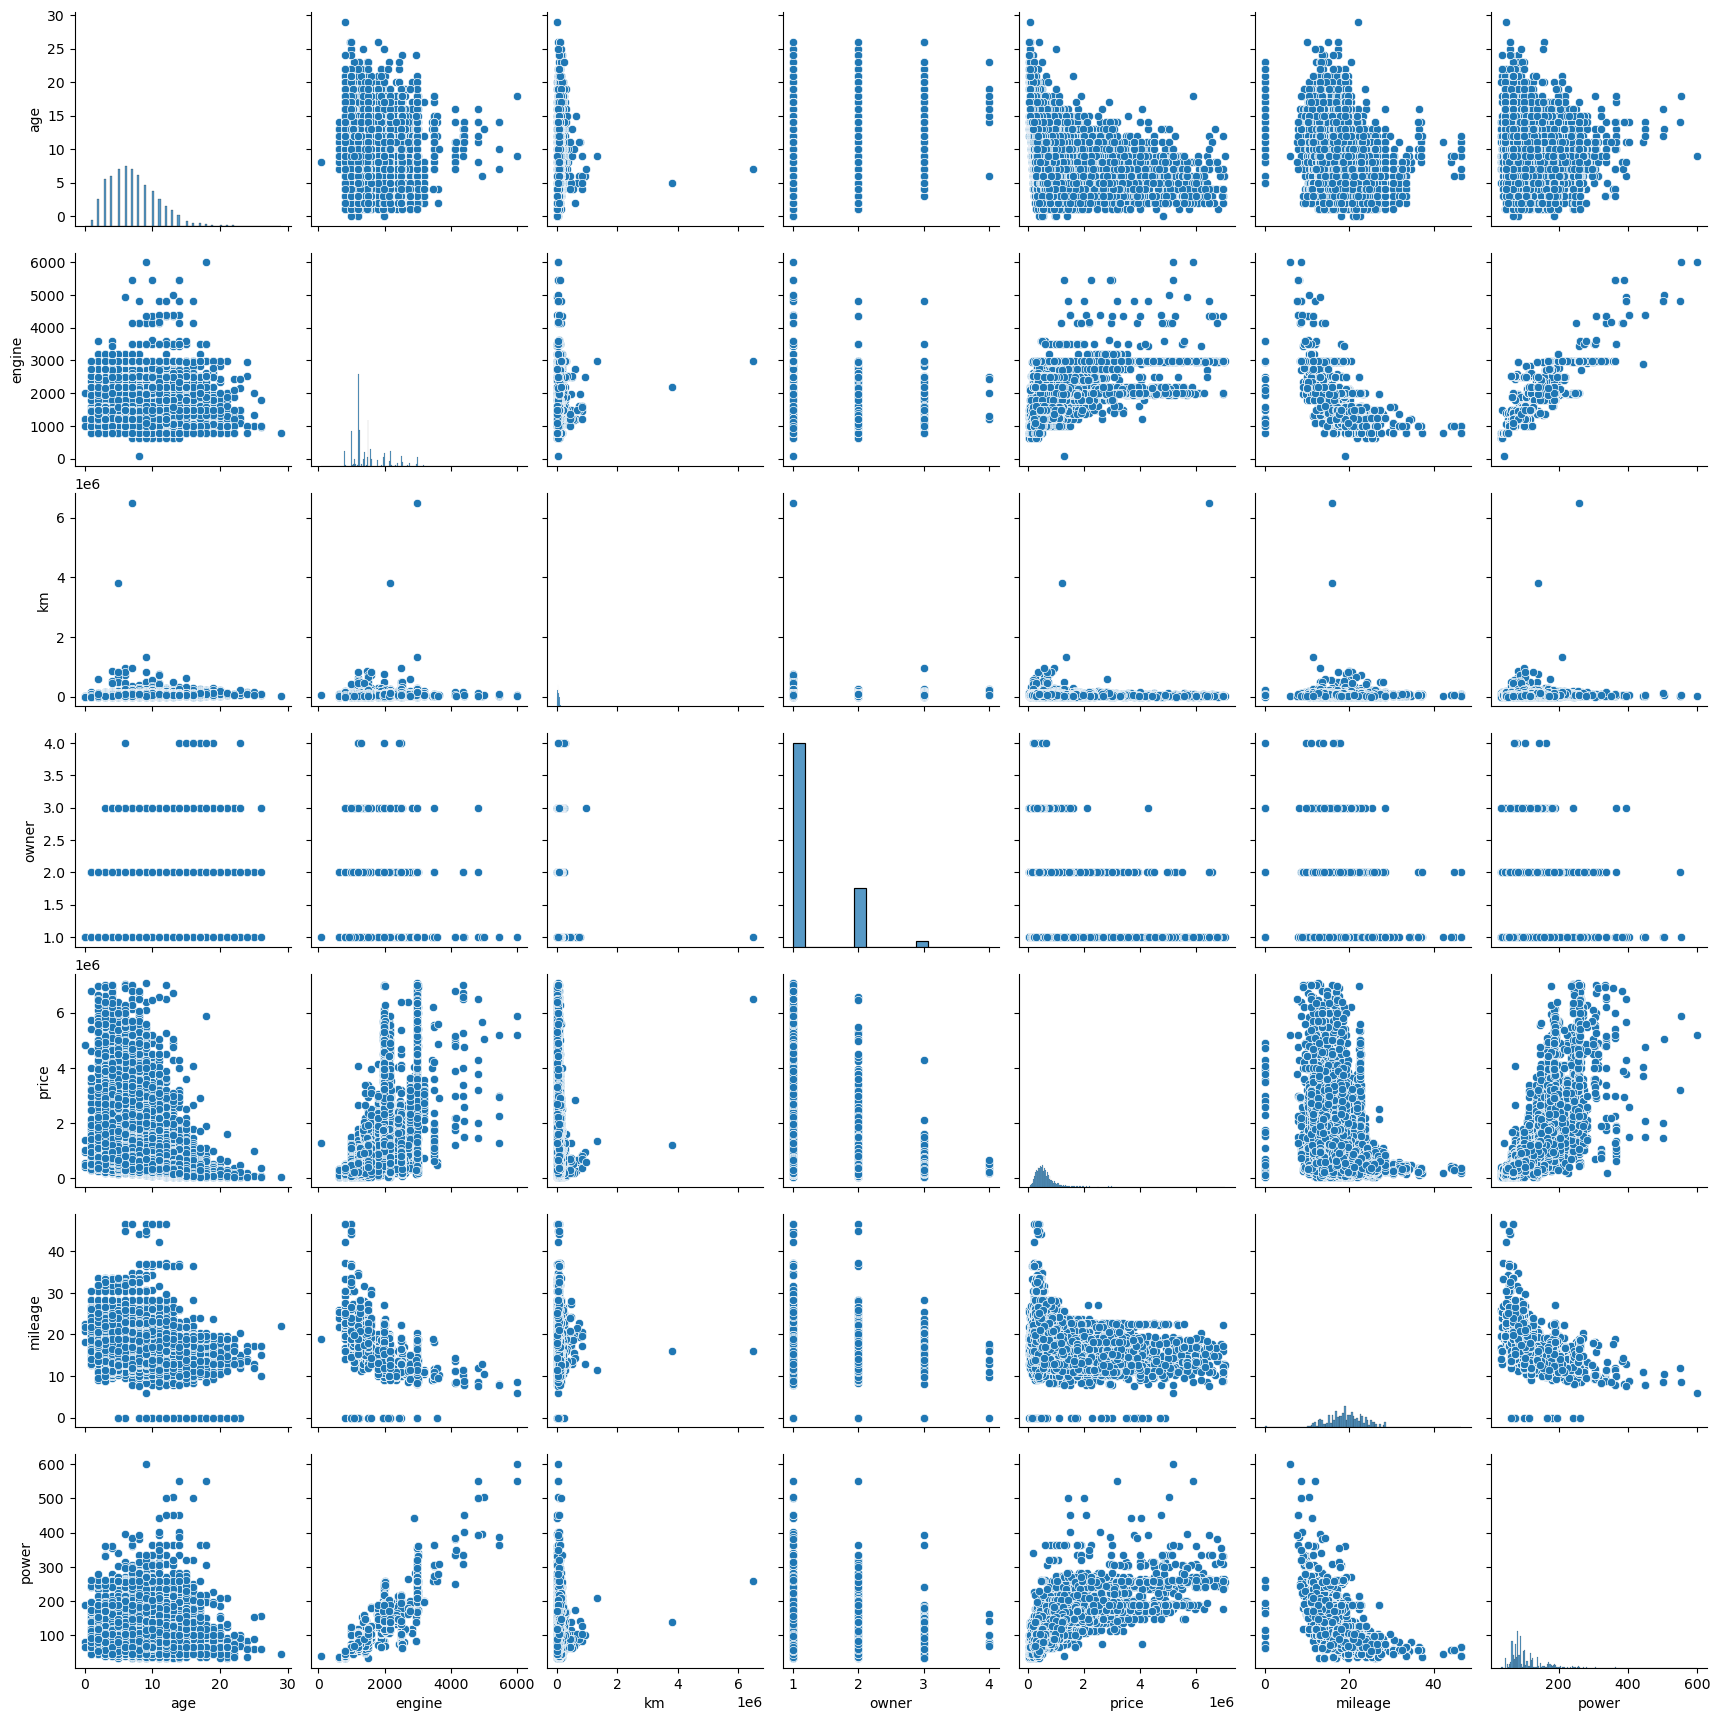

In [41]:
sns.pairplot(df[continous])
plt.show()

**The pairplot of continuous features such as age, engine, km driven, owner count, price, mileage, and power reveals several patterns. Most variables show right-skewed distributions, especially price and km driven, indicating a concentration of values on the lower end with a few high-value outliers. Additionally, there appears to be a positive correlation between engine size, power, and price.**

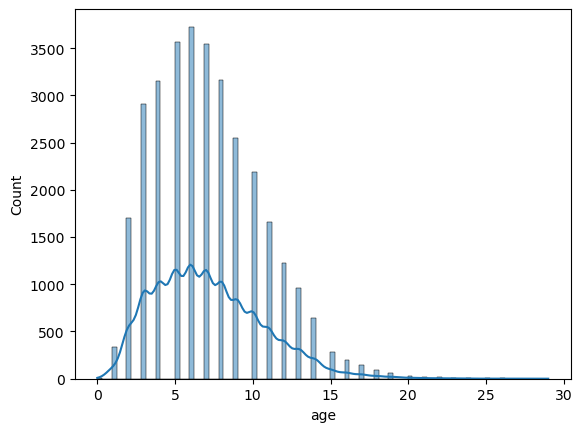

In [42]:
sns.histplot(df['age'],kde=True)
plt.show()

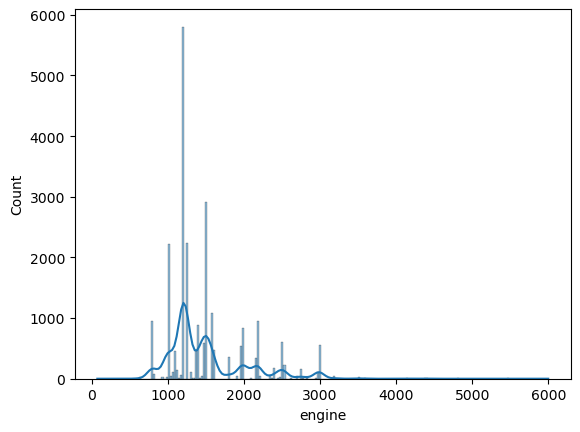

In [43]:
sns.histplot(df['engine'],kde=True)
plt.show()

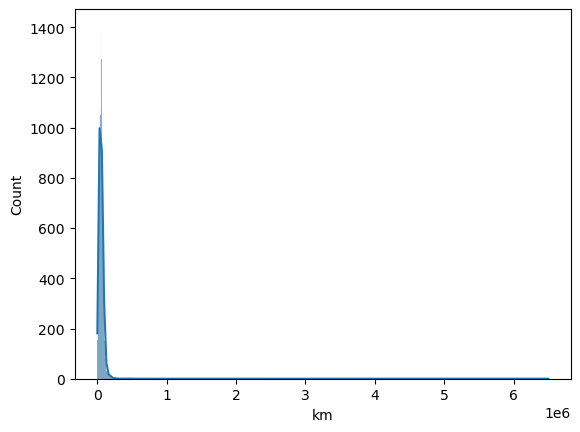

In [44]:
sns.histplot(df['km'],kde=True)
plt.show()

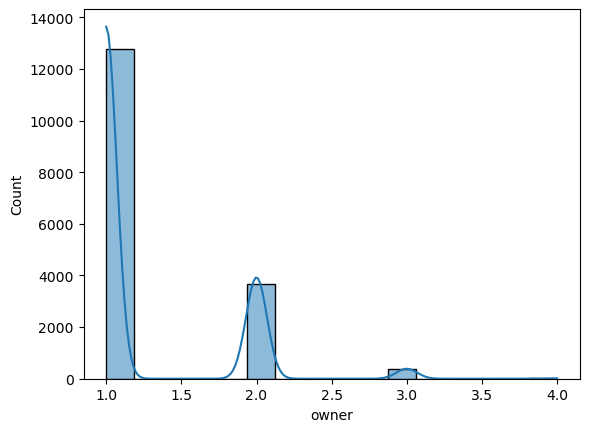

In [45]:
sns.histplot(df['owner'],kde=True)
plt.show()

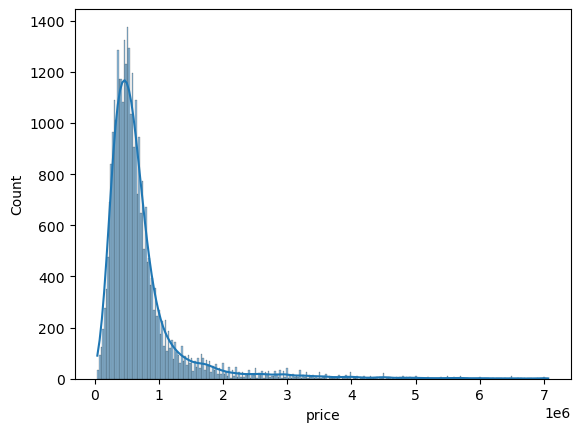

In [46]:
sns.histplot(df['price'],kde=True)
plt.show()

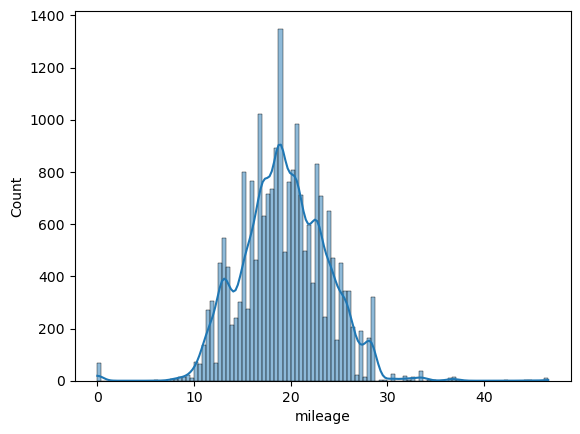

In [47]:
sns.histplot(df['mileage'],kde=True)
plt.show()

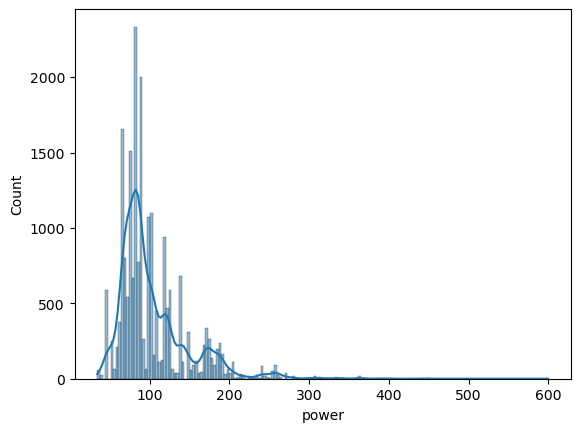

In [48]:
sns.histplot(df['power'],kde=True)
plt.show()

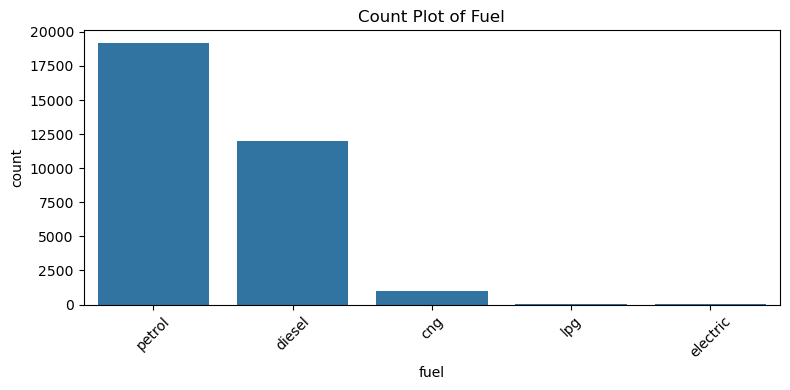

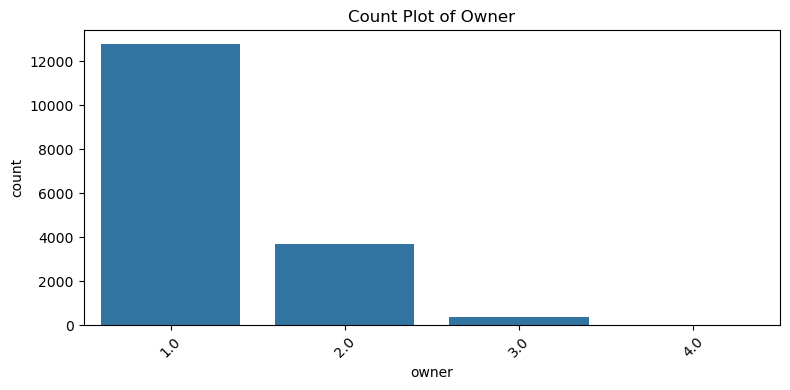

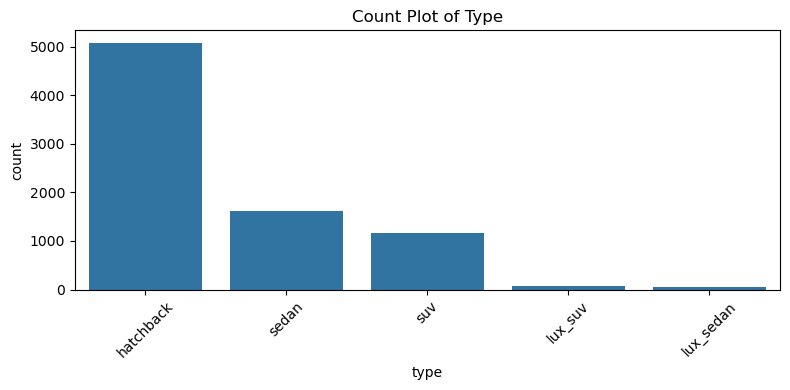

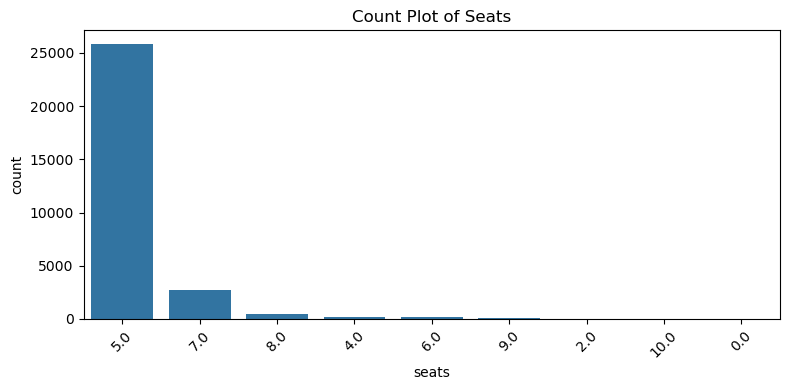

In [49]:
for col in count:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col.capitalize()}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Fuel: Petrol is the most common fuel type, followed by diesel, with a few instances of CNG.
Owner: Most cars have a single previous owner, with fewer having multiple owners.
Type: The dataset contains predominantly hatchbacks, followed by sedans and a smaller number of SUVs.
Seats: The majority of cars have 5 seats, with fewer cars having 4 or more seats.**

In [50]:
df[continous].skew()

age         0.721605
engine      1.598633
km         59.034187
owner       1.679410
price       3.984993
mileage     0.070116
power       2.068545
dtype: float64

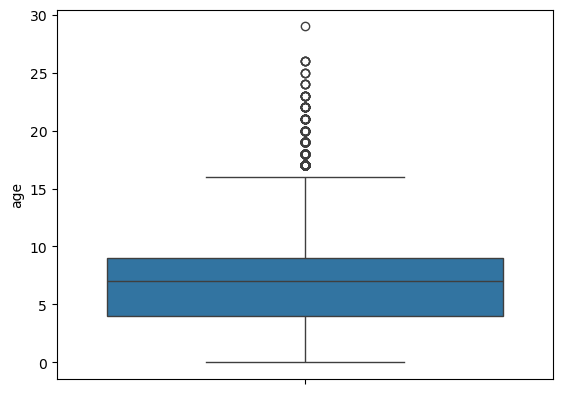

In [51]:
sns.boxplot(df['age'])
plt.show()

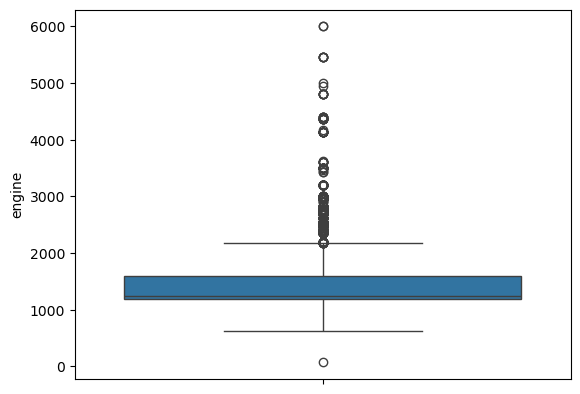

In [52]:
sns.boxplot(df['engine'])
plt.show()

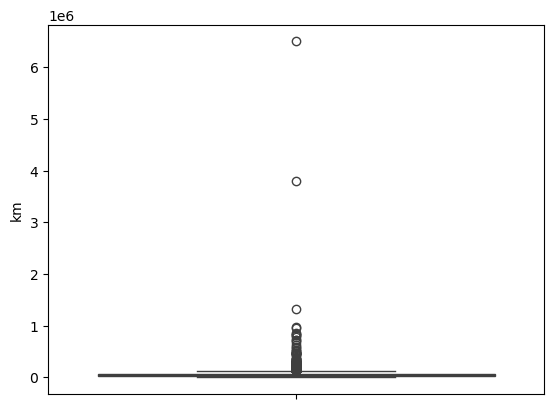

In [53]:
sns.boxplot(df['km'])
plt.show()

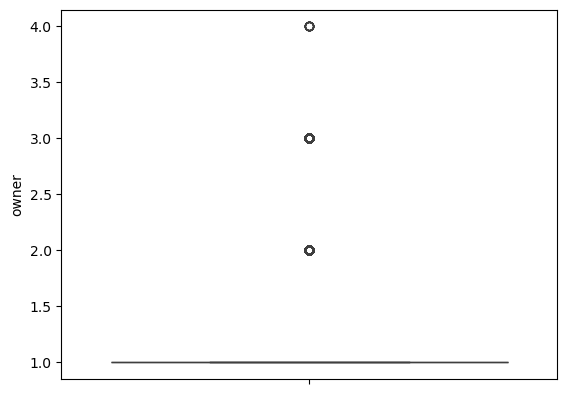

In [54]:
sns.boxplot(df['owner'])
plt.show()

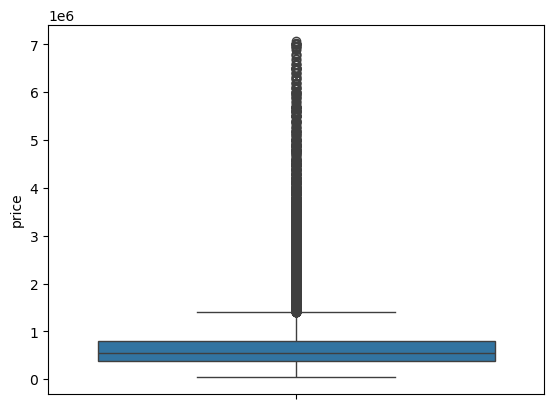

In [55]:
sns.boxplot(df['price'])
plt.show()

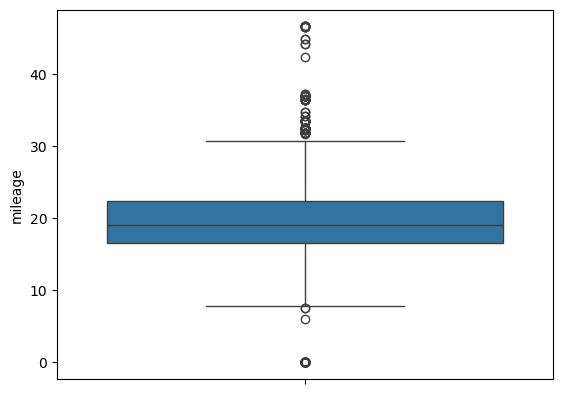

In [56]:
sns.boxplot(df['mileage'])
plt.show()

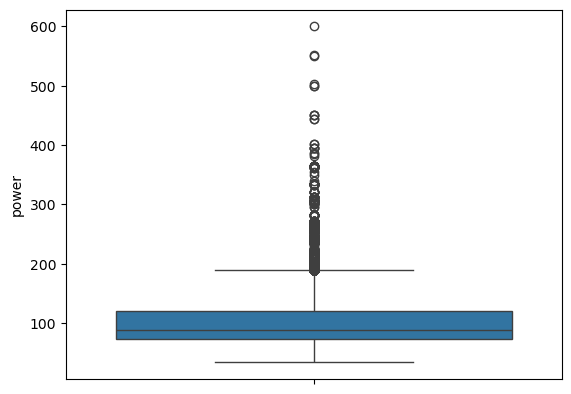

In [57]:
sns.boxplot(df['power'])
plt.show()

In [58]:
df[continous].corr()

,age,engine,km,owner,price,mileage,power
age,1.000000,0.142628,0.250923,0.187501,-0.206513,-0.309554,0.070522
engine,0.142628,1.000000,0.156273,0.013713,0.628310,-0.616014,0.825400
km,0.250923,0.156273,1.000000,0.086191,-0.045677,-0.088618,0.048925
owner,0.187501,0.013713,0.086191,1.000000,-0.119357,-0.152321,0.019546
price,-0.206513,0.628310,-0.045677,-0.119357,1.000000,-0.322014,0.769534
mileage,-0.309554,-0.616014,-0.088618,-0.152321,-0.322014,1.000000,-0.532878
power,0.070522,0.825400,0.048925,0.019546,0.769534,-0.532878,1.000000


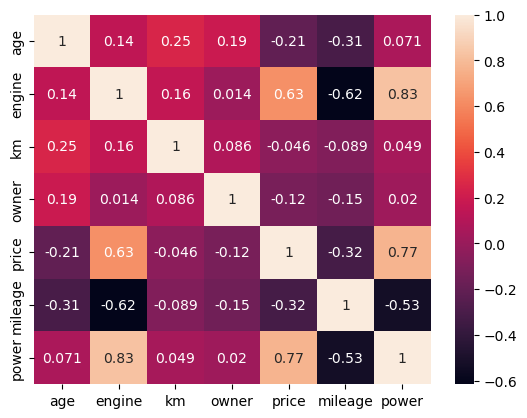

In [59]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

# data preprocessing

In [60]:
import warnings
warnings.simplefilter('ignore')

In [61]:
df.duplicated().sum()

185

**185 duplicates out of 32,015 rows is a very small portion (~0.57%), but still worth handling.**

In [62]:
df.drop_duplicates(inplace = True)
df

,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats,type
0,mahindra,thar,manual,4.0,diesel,2184.0,11003.0,1.0,1231000.0,NaN,NaN,NaN,NaN,NaN
1,hyundai,verna,manual,6.0,petrol,1591.0,66936.0,1.0,786000.0,NaN,NaN,NaN,NaN,NaN
2,tata,harrier,manual,2.0,diesel,1956.0,27990.0,1.0,1489000.0,NaN,NaN,NaN,NaN,NaN
3,honda,city,automatic,1.0,petrol,1498.0,5061.0,1.0,1227000.0,NaN,NaN,NaN,NaN,NaN
4,ford,ecosport,manual,3.0,diesel,1498.0,23480.0,1.0,887000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32195,datsun,redi go,manual,6.0,petrol,NaN,11500.0,1.0,292000.0,maharashtra,NaN,NaN,5.0,hatchback
32196,toyota,yaris,manual,6.0,petrol,NaN,73393.0,2.0,534000.0,karnataka,NaN,NaN,5.0,sedan
32197,volkswagen,ameo,manual,8.0,petrol,NaN,83810.0,2.0,424000.0,uttar pradesh,NaN,NaN,5.0,sedan
32198,hyundai,grand i10 nios,automatic,5.0,petrol,NaN,39162.0,1.0,685000.0,chandigarh,NaN,NaN,5.0,hatchback


**By removing 185 duplicate records, you now have a cleaner dataset of 31,830 unique cars.**

In [63]:
df.isna().sum()

brand               1
model               1
transmission        0
age                 1
fuel                0
engine           8132
km                  0
owner           15199
price               0
location        18216
mileage         10819
power           10926
seats            2846
type            24000
dtype: int64

In [64]:
df.isna().sum()/len(df)*100

brand            0.003124
model            0.003124
transmission     0.000000
age              0.003124
fuel             0.000000
engine          25.400593
km               0.000000
owner           47.474621
price            0.000000
location        56.898329
mileage         33.793534
power           34.127753
seats            8.889583
type            74.964860
dtype: float64

**Droping the  columns like type, owner, and location due to high missing rates; they add noise and reduce reliability.
Impute essential features like mileage, power, and engine using model or brand-wise averages to preserve data quality.**

In [65]:
# Drop columns with high missing values and low relevance
df.drop(columns=['location', 'type', 'owner'], inplace=True)


**i dropped  these columns'location', 'type', 'owner' because so many missing values**

In [66]:
df['engine'].fillna(df['engine'].median(), inplace=True)


**The engine column is important for predicting the price of a used car, as it reflects the vehicle's performance capacity. Although it had 25% missing values, I chose not to drop the column. Instead, I filled the missing values with the median because the column contains outliers, and the median is less sensitive to extreme values compared to the mean or mode. This ensures the data remains robust while preserving its predictive power.**

In [67]:
df['mileage'].fillna(df['mileage'].median(), inplace=True)

**The mileage column is a crucial factor in predicting used car prices, as it indicates fuel efficiency and vehicle condition. Despite having over 30% missing values, I retained the column and filled the missing entries with the median value. This approach was chosen because the presence of outliers in mileage data makes the median a more reliable and stable measure than the mean or mode, helping maintain data integrity and model accuracy.**


In [68]:
df['power'].fillna(df['power'].median(), inplace=True)

**The power column is a crucial factor in predicting used car prices, as it indicates fuel efficiency and vehicle condition. Despite having over 30% missing values, I retained the column and filled the missing entries with the median value. This approach was chosen because the presence of outliers in power data makes the median a more reliable and stable measure than the mean or mode, helping maintain data integrity and model accuracy.**

In [69]:
df.drop(index=29086, inplace=True)


**I dropped row 29086 because it had missing values in both the brand and model columns, which are important for predicting the car's price. Keeping incomplete data could affect the accuracy of the analysis.**

In [70]:
df.isna().sum()

brand              0
model              0
transmission       0
age                0
fuel               0
engine             0
km                 0
price              0
mileage            0
power              0
seats           2846
dtype: int64

In [71]:
df[df['seats'].isnull()]

,brand,model,transmission,age,fuel,engine,km,price,mileage,power,seats
0,mahindra,thar,manual,4.0,diesel,2184.0,11003.0,1231000.0,19.01,88.7,NaN
1,hyundai,verna,manual,6.0,petrol,1591.0,66936.0,786000.0,19.01,88.7,NaN
2,tata,harrier,manual,2.0,diesel,1956.0,27990.0,1489000.0,19.01,88.7,NaN
3,honda,city,automatic,1.0,petrol,1498.0,5061.0,1227000.0,19.01,88.7,NaN
4,ford,ecosport,manual,3.0,diesel,1498.0,23480.0,887000.0,19.01,88.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7741,fiat,punto,manual,14.0,petrol,1197.0,47000.0,149000.0,14.60,74.0,NaN
7804,maruti,swift,manual,18.0,petrol,1197.0,63000.0,160000.0,16.10,74.0,NaN
7974,maruti,swift,manual,12.0,petrol,1197.0,52000.0,365000.0,16.10,74.0,NaN
8059,honda,city,manual,22.0,petrol,1197.0,53000.0,185000.0,0.00,74.0,NaN


In [72]:
# Calculate the mean of the 'seats' colu
df['seats'].median()


5.0

In [73]:
# Replace NaN values in 'seats' column with 5
df['seats'].fillna(5, inplace=True)


**Since the seats column is a count of the number of seats in a car, I replaced the missing values with 5, as it's the most common value for car seating. This helps maintain consistency without introducing bias, as 5 is typical for many car types.**

In [74]:
df[df['seats']==0]

,brand,model,transmission,age,fuel,engine,km,price,mileage,power,seats
6790,audi,a4,automatic,12.0,petrol,3197.0,125000.0,1800000.0,10.50,88.70,0.0
12014,honda,city,manual,18.0,petrol,1493.0,40000.0,115000.0,13.00,100.00,0.0
21397,nissan,kicks,manual,2.0,diesel,1461.0,10000.0,1154000.0,19.39,108.49,0.0


In [75]:
df['seats'] = df['seats'].replace(0, 5)



In [76]:
df

,brand,model,transmission,age,fuel,engine,km,price,mileage,power,seats
0,mahindra,thar,manual,4.0,diesel,2184.0,11003.0,1231000.0,19.01,88.7,5.0
1,hyundai,verna,manual,6.0,petrol,1591.0,66936.0,786000.0,19.01,88.7,5.0
2,tata,harrier,manual,2.0,diesel,1956.0,27990.0,1489000.0,19.01,88.7,5.0
3,honda,city,automatic,1.0,petrol,1498.0,5061.0,1227000.0,19.01,88.7,5.0
4,ford,ecosport,manual,3.0,diesel,1498.0,23480.0,887000.0,19.01,88.7,5.0
...,...,...,...,...,...,...,...,...,...,...,...
32195,datsun,redi go,manual,6.0,petrol,1248.0,11500.0,292000.0,19.01,88.7,5.0
32196,toyota,yaris,manual,6.0,petrol,1248.0,73393.0,534000.0,19.01,88.7,5.0
32197,volkswagen,ameo,manual,8.0,petrol,1248.0,83810.0,424000.0,19.01,88.7,5.0
32198,hyundai,grand i10 nios,automatic,5.0,petrol,1248.0,39162.0,685000.0,19.01,88.7,5.0


**Since some of the values in the `seats` column were zero, I replaced them with 5, as it is the most common and realistic value for car seating. This ensures the data is consistent and avoids unrealistic zero values that could negatively affect analysis or model performance.**


In [77]:
df.reset_index(drop=True, inplace=True)


In [78]:
df.isna().sum()

brand           0
model           0
transmission    0
age             0
fuel            0
engine          0
km              0
price           0
mileage         0
power           0
seats           0
dtype: int64

In [79]:
Continous = ['age','engine','km','mileage','power','price']
Count = ['seats']
Categorical =['brand','model','transmission','fuel']

In [80]:
df[Continous].skew()

age         0.719383
engine      2.074500
km         59.057360
mileage     0.171347
power       2.798866
price       3.988909
dtype: float64

In [81]:
import numpy as np

# Applying log transformation for columns with high skewness
columns_to_transform = ['engine', 'km', 'power']

# Adding a small constant to avoid log(0) issues if there are zero values
for col in columns_to_transform:
    df[col] = np.log1p(df[col])  # log1p is log(1 + x), which handles zero values

# Check the skewness after transformation
skewness_after_transformation = df[columns_to_transform].skew()
print(skewness_after_transformation)


engine    1.025116
km       -1.368233
power     1.054943
dtype: float64


In [82]:
df[Continous].skew()

age        0.719383
engine     1.025116
km        -1.368233
mileage    0.171347
power      1.054943
price      3.988909
dtype: float64

In [83]:
df[Continous].describe()

,age,engine,km,mileage,power,price
count,32014.000000,32014.000000,32014.000000,32014.000000,32014.000000,3.201400e+04
mean,7.129568,7.224240,10.690999,19.200848,4.549351,7.344563e+05
std,3.487354,0.272477,0.739357,3.598568,0.300140,7.031343e+05
min,0.000000,4.290459,0.000000,0.000000,3.561046,4.000000e+04
25%,4.000000,7.088409,10.317755,17.920000,4.418841,3.850000e+05
50%,7.000000,7.130099,10.819798,19.010000,4.496471,5.510000e+05
75%,9.000000,7.312553,11.171902,20.510000,4.615121,7.920000e+05
max,29.000000,8.699348,15.687313,46.620600,6.398595,7.066000e+06


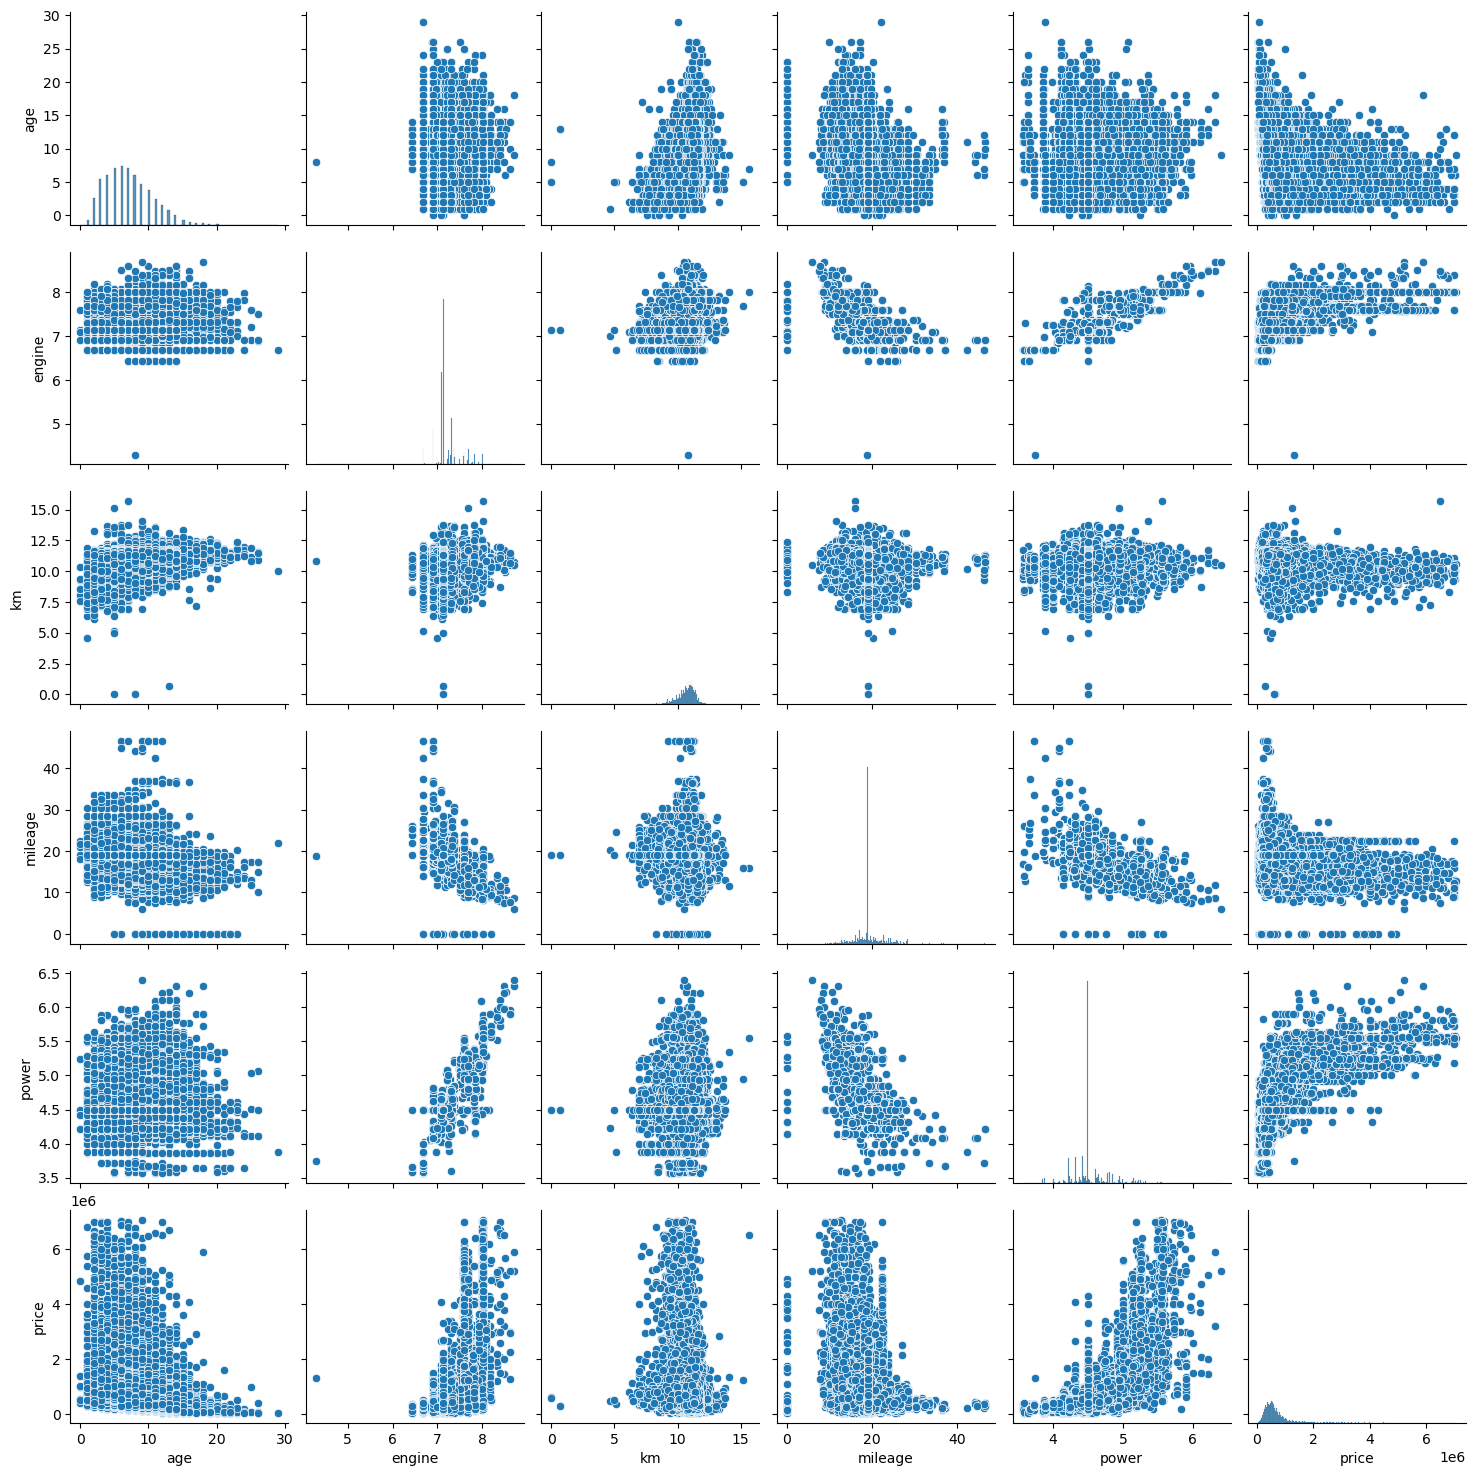

In [84]:
sns.pairplot(df[Continous])
plt.show()

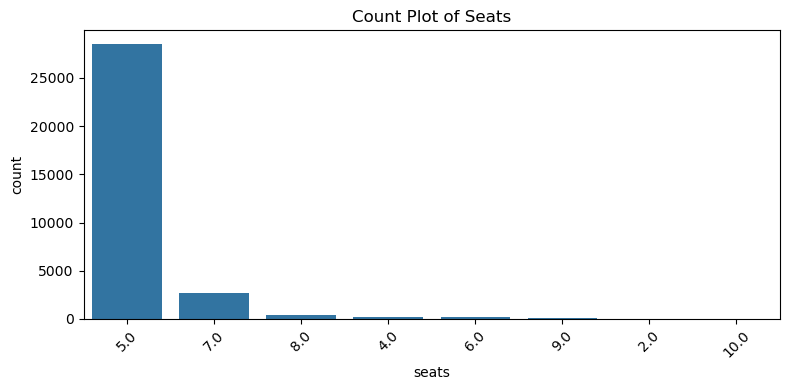

In [85]:
for col in Count:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col.capitalize()}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [86]:
df[Categorical].describe()

,brand,model,transmission,fuel
count,32014,32014,32014,32014
unique,35,301,2,5
top,maruti,swift,manual,petrol
freq,10497,1856,24756,19053


In [87]:
df[Continous].corr()

,age,engine,km,mileage,power,price
age,1.000000,0.119638,0.451480,-0.265418,0.039822,-0.206076
engine,0.119638,1.000000,0.194271,-0.561368,0.828115,0.600651
km,0.451480,0.194271,1.000000,-0.091880,0.068943,-0.138230
mileage,-0.265418,-0.561368,-0.091880,1.000000,-0.527759,-0.304098
power,0.039822,0.828115,0.068943,-0.527759,1.000000,0.699705
price,-0.206076,0.600651,-0.138230,-0.304098,0.699705,1.000000


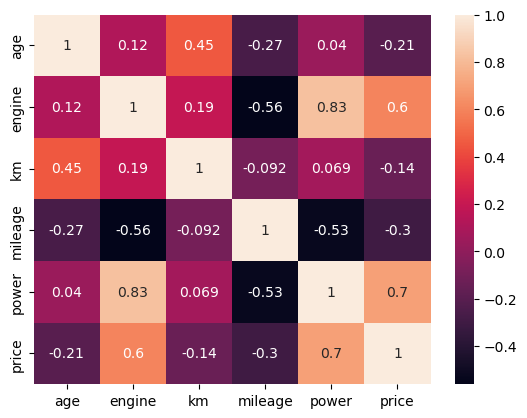

In [88]:
sns.heatmap(df[Continous].corr(),annot=True)
plt.show()

In [89]:
from statsmodels.formula.api import ols
import pandas as pd

# Your DataFrame is assumed to be named 'df'
variables = ['engine', 'power','mileage']
vif_values = []

for var in variables:
    other_vars = [v for v in variables if v != var]
    formula = f'{var} ~ {" + ".join(other_vars)}'
    rsq = ols(formula, data=df).fit().rsquared
    vif = 1 / (1 - rsq)
    vif_values.append(vif)

# Create DataFrame to store VIFs
vif_frame = pd.DataFrame({'Variables': variables, 'VIF': vif_values})
print(vif_frame)


  Variables       VIF
0    engine  3.415274
1     power  3.241996
2   mileage  1.487470


In [90]:
# Dropping the 'km' column from the DataFrame
df = df.drop(columns=['km','engine'])

# Checking if the column is dropped

print(df.columns)


Index(['brand', 'model', 'transmission', 'age', 'fuel', 'price', 'mileage',
       'power', 'seats'],
      dtype='object')


In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['brand'] = le.fit_transform(df['brand'])
df

,brand,model,transmission,age,fuel,price,mileage,power,seats
0,18,thar,manual,4.0,diesel,1231000.0,19.01,4.496471,5.0
1,10,verna,manual,6.0,petrol,786000.0,19.01,4.496471,5.0
2,31,harrier,manual,2.0,diesel,1489000.0,19.01,4.496471,5.0
3,9,city,automatic,1.0,petrol,1227000.0,19.01,4.496471,5.0
4,8,ecosport,manual,3.0,diesel,887000.0,19.01,4.496471,5.0
...,...,...,...,...,...,...,...,...,...
32009,5,redi go,manual,6.0,petrol,292000.0,19.01,4.496471,5.0
32010,32,yaris,manual,6.0,petrol,534000.0,19.01,4.496471,5.0
32011,33,ameo,manual,8.0,petrol,424000.0,19.01,4.496471,5.0
32012,10,grand i10 nios,automatic,5.0,petrol,685000.0,19.01,4.496471,5.0


In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['model'] = le.fit_transform(df['model'])
df

,brand,model,transmission,age,fuel,price,mileage,power,seats
0,18,244,manual,4.0,diesel,1231000.0,19.01,4.496471,5.0
1,10,263,manual,6.0,petrol,786000.0,19.01,4.496471,5.0
2,31,123,manual,2.0,diesel,1489000.0,19.01,4.496471,5.0
3,9,55,automatic,1.0,petrol,1227000.0,19.01,4.496471,5.0
4,8,82,manual,3.0,diesel,887000.0,19.01,4.496471,5.0
...,...,...,...,...,...,...,...,...,...
32009,5,199,manual,6.0,petrol,292000.0,19.01,4.496471,5.0
32010,32,295,manual,6.0,petrol,534000.0,19.01,4.496471,5.0
32011,33,25,manual,8.0,petrol,424000.0,19.01,4.496471,5.0
32012,10,120,automatic,5.0,petrol,685000.0,19.01,4.496471,5.0


In [93]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['transmission'] = le.fit_transform(df['transmission'])
df

,brand,model,transmission,age,fuel,price,mileage,power,seats
0,18,244,1,4.0,diesel,1231000.0,19.01,4.496471,5.0
1,10,263,1,6.0,petrol,786000.0,19.01,4.496471,5.0
2,31,123,1,2.0,diesel,1489000.0,19.01,4.496471,5.0
3,9,55,0,1.0,petrol,1227000.0,19.01,4.496471,5.0
4,8,82,1,3.0,diesel,887000.0,19.01,4.496471,5.0
...,...,...,...,...,...,...,...,...,...
32009,5,199,1,6.0,petrol,292000.0,19.01,4.496471,5.0
32010,32,295,1,6.0,petrol,534000.0,19.01,4.496471,5.0
32011,33,25,1,8.0,petrol,424000.0,19.01,4.496471,5.0
32012,10,120,0,5.0,petrol,685000.0,19.01,4.496471,5.0


In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df

,brand,model,transmission,age,fuel,price,mileage,power,seats
0,18,244,1,4.0,1,1231000.0,19.01,4.496471,5.0
1,10,263,1,6.0,4,786000.0,19.01,4.496471,5.0
2,31,123,1,2.0,1,1489000.0,19.01,4.496471,5.0
3,9,55,0,1.0,4,1227000.0,19.01,4.496471,5.0
4,8,82,1,3.0,1,887000.0,19.01,4.496471,5.0
...,...,...,...,...,...,...,...,...,...
32009,5,199,1,6.0,4,292000.0,19.01,4.496471,5.0
32010,32,295,1,6.0,4,534000.0,19.01,4.496471,5.0
32011,33,25,1,8.0,4,424000.0,19.01,4.496471,5.0
32012,10,120,0,5.0,4,685000.0,19.01,4.496471,5.0


In [95]:
df

,brand,model,transmission,age,fuel,price,mileage,power,seats
0,18,244,1,4.0,1,1231000.0,19.01,4.496471,5.0
1,10,263,1,6.0,4,786000.0,19.01,4.496471,5.0
2,31,123,1,2.0,1,1489000.0,19.01,4.496471,5.0
3,9,55,0,1.0,4,1227000.0,19.01,4.496471,5.0
4,8,82,1,3.0,1,887000.0,19.01,4.496471,5.0
...,...,...,...,...,...,...,...,...,...
32009,5,199,1,6.0,4,292000.0,19.01,4.496471,5.0
32010,32,295,1,6.0,4,534000.0,19.01,4.496471,5.0
32011,33,25,1,8.0,4,424000.0,19.01,4.496471,5.0
32012,10,120,0,5.0,4,685000.0,19.01,4.496471,5.0


In [96]:
# Separate the features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']


In [97]:
Train =[]
CV =[]
for i in range(0,100):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    
    from sklearn.linear_model import LinearRegression
    model =LinearRegression()
    model.fit(X_train,y_train)
    
    ypred_train = model.predict(X_train)

    from sklearn.metrics import r2_score
    Train.append(r2_score(y_train,ypred_train))
    
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(model,X_train,y_train,cv=5).mean())

em = pd.DataFrame({'Train':Train,'CV':CV})
gm = em[(abs(em['Train']-em['CV'])<=0.05)]
rs = gm[gm['CV']==gm['CV'].max()].index.tolist()[0]
print('best random state number:',rs)
    

best random state number: 32


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)



In [99]:
df.to_excel('CAR.xlsx',index=False)